In [100]:
#import all library we need to use
#from numpy import *
import numpy as np
from mpi4py import MPI
import matplotlib.pyplot as plt #comment this sentence

In [4]:
#read size and node number(rank)
comm = MPI.COMM_WORLD
size = comm.Get_size() #get the number of how many rank we have
rank = comm.Get_rank() #get the rank name
node_name = MPI.Get_processor_name() # get the name of the node

In [168]:
#read data in
def load_data(file_name):
    data = open(file_name)
    data = data.read().splitlines()
    result = []
    i = data#.readlines(3)
        #oline = i.strip().split('\n')
        #fline = map(float, oline)    # 将每个元素转成float类型
        #print(fline)
    for j in i:
        print(j)
        j = (j.split(' '))
        for k in range(len(j)):
            j[k] = int(j[k])
        result.append(j) #line)
    return result

In [178]:
#process data
#determine the value of K in Kmeans
def set_K():
    max_K= 10 # this means the largest K we will test in our program, default 10
    print("will try K from 2 to",max_K,", do you want to change it?");
    det_ew_K = input("y/n: ");
    if(det_ew_K == "y"):
        print("Please tell me the value of new K.");
        max_K = int(input("new_K: "));
    return max_K

#calculate Euclid distance between two points
#don't forget normalize your data before you use E distance
def E_distance(point_a, point_b):
    return sqrt(sum(pow(point_a - point_b,2)))

#set the center of each cluster
def set_center(data,num_k):
    # Madhu Yedla et al's method
    #first check whether the dataset have negative value
    #data should be array 
    data_pro = np.array(data)
    for j in range(np.size(data_pro,1)):
        if min(data_pro[:,j]) < 0:       #if dataset have negative value, then move the dataset
            data_pro[:,j] = data_pro[:,j] - resize(min(data_pro[:,j]), np.size(data_pro,0))
    #then calculate the distance from each point to the center of coordinator
    distance = zeros(np.size(data_pro,0))
    for i in range(np.size(data_pro,0)):
        distance[i] = E_distance(data_pro[i,:], zeros(np.size(data_pro,1)))
        #distance[1,i] = i  #save the point index of each distance
    #order the distance
    index = np.argsort(distance) #sort the number and get the original index
    #divide the dataset to K different classes
    num_per_class = int(np.size(data_pro,0)/num_k)
    #then find the point which have the meidum distance in this class as the center  point of this classes
    result = []
    for k in range(0,np.size(data_pro,0),num_per_class+1):
        result.append(index[int(k + num_per_class/2)]) #save the point index
        
    return result

def find_center(data):
    sum_h = 0
    center = zeros(np.size(data,1)) #the center of dataset
    for j in range(np.size(data,1)): #how many vertical lines we have
        for i in range(np.size(data,0)): #how many horizontal lines we have
            sum_h = sum_h + data[i][j]
        center[j] = sum_h / np.size(data,0)
    return center
        
def stop_or_not(center_new, center_old):
    error = sum(np.array(center_new) - np.array(center_old))/np.size(center_new)
    if error < 0.1:
        return true
    else:
        return false

def kmeans(data,k):
    #k = set_K()
    r = 0 # how many round we will run for kmeans
    initial_point_index = set_center(data,k)
    initial_point = []
    group = []
    past_center = []
    center = []
    for i in range(k):
        initial_point.append(data[initial_point_index[i]]) 
        group.append([]) #initialize group
        center.append(zeros(np.size(data,1))) #initialize the center array
        past_center.append(1000*ones(np.size(data,1))) #initialize the past_center array
    #the core of kmeans
    while(r < 100): #(stop_or_not(center,past_center)): 
        for i in range(np.size(data,0)):
            min_d = inf
            g = 0
            for j in range(k):
                if min_d > E_distance(data[i,:],initial_point[j,:]):
                    min_d = E_distance(data[i,:],initial_point[j,:])
                    g = j
            group[g].append(data[i,:]) #generate new group
        past_center = center
        for i in range(k):
            initial_point[i] = find_center(group[i])
        r = r + 1
    return group
    
#read data in
#data = [[1,2],[3,4],[5,6],[7,8],[9,10]]#(load_data("data.txt"))
#Ready to process
#for i in range(1,max_K):

    
#data_send = [rank]*5
#comm.send(data_send,dest=(rank+1)%size)
#data_recv =comm.recv(source=(rank-1)%size)
#print("my rank is %d, and I received:" % rank)
#print(data_recv)

In [190]:
#int((data[0,0])[0])
#data
a = array([1,3])
b = array([3,4])
pow(4-2,2)
shape(data)[1]

2

In [138]:
#sqrt(sum(pow(a-b,2)))
#random.rand(1,10)*10
a = np.array([[2,2,4],[1,2,3],[2,2,3],[2,2,3]])
len(a[1][:])
max(a[0][:])
a[:,0] = a[:,0] - resize(min(a[:,0]),np.size(a,0))
np.size(a,1)

3

In [91]:
#resize(min(a[:][0]),np.size(a,0))
a = np.array(a)
a[:,0]
b = zeros((2,np.size(a,0)))
b[:,1]
c = np.array([2,5,4,3,6,7,8,9,10,3,5])
np.argsort(c)
#int(1.8)

array([ 0,  3,  9,  2,  1, 10,  4,  5,  6,  7,  8], dtype=int64)

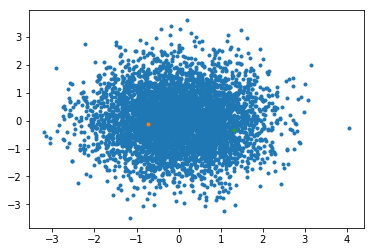

In [135]:
#plot the test result of initial point
mean = [0,0]
cov = [[1,0],[0,1]]
mean1 = [5,5]
k = 2
data = np.random.multivariate_normal(mean, cov, 5000)
r = set_center(data,k)
plt.plot(data[:,0],data[:,1],'.')

for i in range(k):
    plt.plot(data[r[i],0],data[r[i],1],'.')

In [176]:
np.size(data,1)
d = [[],[],[],[]]
d[0].append(1)
d[0].append(1)
group = []
for i in range(k):
        group.append([])
group[1].append([1,2])
group[1].append([3,4])
group[1][0], group
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
a = b
a = a - np.array([1,1,1,1])
c = np.array([1,2,3,4,5])
d = np.array([1,2,3,4,5])*2
sum(d - c)

15